In [59]:
import pandas as pd

# Завантаження даних з файлу CSV
data = pd.read_csv('indian_liver_patient.csv')

# Виведення назв колонок
print("Назви колонок:")
print(data.columns)

# Виведення розміру датасету
print(f"Розмір датасету: {data.shape}")


Назви колонок:
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'DiseaseStatus'],
      dtype='object')
Розмір датасету: (583, 11)


Total_Bilirubin: Загальний рівень білірубіну в крові. Білірубін — це пігмент, що утворюється при розпаді червоних кров'яних клітин. Високий рівень може вказувати на проблеми з печінкою або іншими органами.

Direct_Bilirubin: Рівень прямого (кон'югованого) білірубіну. Це тип білірубіну, який проходить через печінку. Високий рівень може свідчити про блокування жовчних шляхів.

Alkaline_Phosphotase: Лужна фосфатаза — фермент, що міститься в клітинах печінки і кісток. Високий рівень цього ферменту може вказувати на проблеми з печінкою, кістками або жовчними шляхами.

Alamine_Aminotransferase (ALT): Аланін-амінотрансфераза — фермент печінки, рівень якого може збільшуватися при пошкодженні печінки. Цей показник використовується для оцінки функції печінки.

Aspartate_Aminotransferase (AST): Аспартат-амінотрансфераза — ще один фермент печінки. Високий рівень цього ферменту також вказує на можливі проблеми з печінкою або серцем.

Total_Protiens: Загальний рівень білків у крові. Цей показник показує загальний стан білкового обміну в організмі і функцію печінки.

Albumin: Рівень альбуміну — основного білка плазми крові. Зниження рівня альбуміну може свідчити про захворювання печінки або нирок.

Albumin_and_Globulin_Ratio: Співвідношення альбуміну до глобулінів. Це співвідношення може використовуватися для оцінки функції печінки і нирок.

DiseaseStatus: Цільова змінна, яка вказує на стан здоров'я пацієнта. Вона може мати два значення:

1: Наявність захворювання.
0: Відсутність захворювання.

In [60]:
# Перетворення змінної Gender на числові значення (Female -> 0, Male -> 1)
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Перевірка колонок після перетворення
print(data.columns)

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'DiseaseStatus', 'Gender_Male'],
      dtype='object')


In [61]:
# Заповнення пропусків середніми значеннями
data.fillna(data.mean(), inplace=True)

# Перевірка на наявність пропусків
print(data.isnull().sum())

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
DiseaseStatus                 0
Gender_Male                   0
dtype: int64


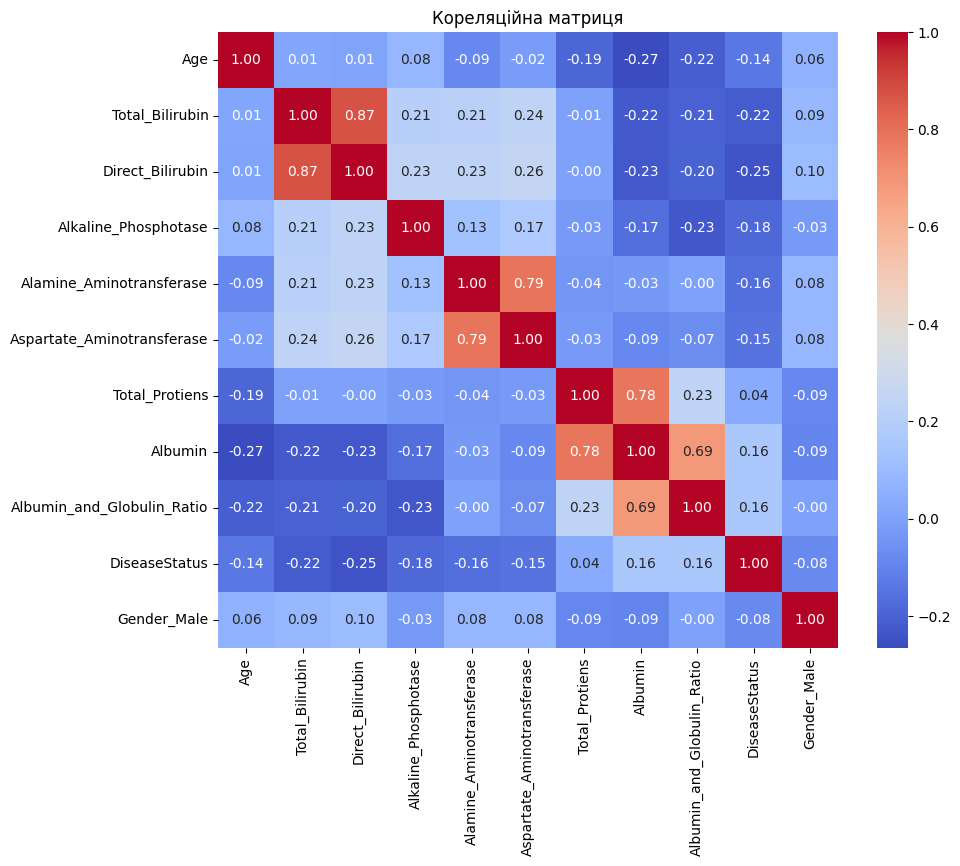

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Побудова матриці кореляцій для числових колонок
corr_matrix = data.corr()

# Відображення теплової карти (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляційна матриця')
plt.show()


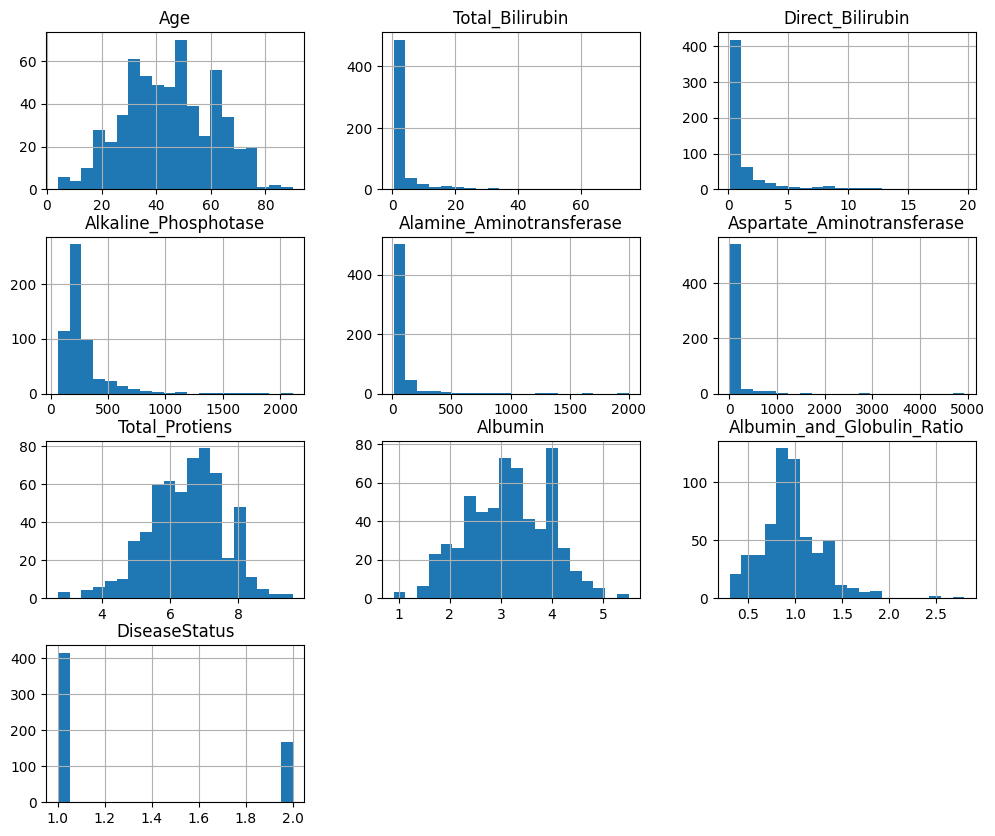

In [63]:
# Виведення гістограми для кожної числової ознаки
data.hist(figsize=(12, 10), bins=20)
plt.show()

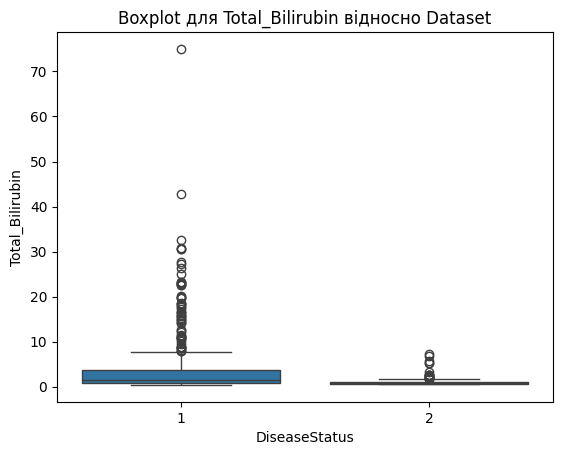

In [64]:
# Приклад побудови boxplot для ознаки Total_Bilirubin відносно цільової змінної Dataset
sns.boxplot(x='DiseaseStatus', y='Total_Bilirubin', data=data)
plt.title('Boxplot для Total_Bilirubin відносно Dataset')
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler

# Вибір числових ознак для нормалізації (крім цільової змінної 'DiseaseStatus')
X = data.drop(['DiseaseStatus'], axis=1)
y = data['DiseaseStatus']

# Нормалізація
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Навчання kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Прогнозування
y_pred_knn = knn.predict(X_test)

# Оцінка
print("Classification Report for kNN:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix for kNN:")
print(confusion_matrix(y_test, y_pred_knn))


Classification Report for kNN:
              precision    recall  f1-score   support

           1       0.78      0.74      0.76        87
           2       0.34      0.40      0.37        30

    accuracy                           0.65       117
   macro avg       0.56      0.57      0.56       117
weighted avg       0.67      0.65      0.66       117

Confusion Matrix for kNN:
[[64 23]
 [18 12]]


In [67]:
from sklearn.tree import DecisionTreeClassifier

# Навчання дерева рішень
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Прогнозування
y_pred_tree = tree.predict(X_test)

# Оцінка
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))

print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_tree))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           1       0.84      0.77      0.80        87
           2       0.46      0.57      0.51        30

    accuracy                           0.72       117
   macro avg       0.65      0.67      0.65       117
weighted avg       0.74      0.72      0.73       117

Confusion Matrix for Decision Tree:
[[67 20]
 [13 17]]


In [68]:
from sklearn.ensemble import RandomForestClassifier

# Навчання Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Прогнозування
y_pred_rf = rf.predict(X_test)

# Оцінка
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.81      0.87      0.84        87
           2       0.52      0.40      0.45        30

    accuracy                           0.75       117
   macro avg       0.67      0.64      0.65       117
weighted avg       0.73      0.75      0.74       117

Confusion Matrix for Random Forest:
[[76 11]
 [18 12]]


In [69]:
from sklearn.ensemble import AdaBoostClassifier

# Навчання AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

# Прогнозування
y_pred_ada = ada.predict(X_test)

# Оцінка
print("Classification Report for AdaBoost:")
print(classification_report(y_test, y_pred_ada))

print("Confusion Matrix for AdaBoost:")
print(confusion_matrix(y_test, y_pred_ada))


Classification Report for AdaBoost:
              precision    recall  f1-score   support

           1       0.78      0.82      0.80        87
           2       0.38      0.33      0.36        30

    accuracy                           0.69       117
   macro avg       0.58      0.57      0.58       117
weighted avg       0.68      0.69      0.68       117

Confusion Matrix for AdaBoost:
[[71 16]
 [20 10]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
